# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/Users/ellengrant/Desktop/Analysis_Projects/Challenges/challenge-5/Starter_Code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/ellengrant/Desktop/Analysis_Projects/Challenges/challenge-5/Starter_Code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [2]:
# Print the column names of each DataFrame to check for typos or missing columns
print("Mouse Metadata columns:", mouse_metadata.columns)
print("Study Results columns:", study_results.columns)

Mouse Metadata columns: Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Study Results columns: Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


In [3]:
# Combine the data into a single DataFrame
merge_data = pd.merge(mouse_metadata, study_results, how="left",on=["Mouse ID"])

# Display the data table for preview
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mice_count = merge_data["Mouse ID"].nunique()
print(f'Total number of mice in the study: {mice_count}.')

Total number of mice in the study: 249.


In [22]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_entries = merge_data[merge_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicate_entries["Mouse ID"].unique()

print("Data associated with Mouse IDs with duplicate time points:")
print(duplicate_mouse_ids)


Data associated with Mouse IDs with duplicate time points:
['g989']


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
print("Duplicate entries based on Mouse ID and Timepoint:")
display(duplicate_entries.head())


Duplicate entries based on Mouse ID and Timepoint:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merge_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first')
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
updated_mice_count = cleaned_df['Mouse ID'].nunique()
print(f'Updated number of unique mice in the study after removing duplicates: {updated_mice_count}')

Updated number of unique mice in the study after removing duplicates: 249


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped = cleaned_df.groupby('Drug Regimen')
summary_df = pd.DataFrame({
    "Mean Tumor Volume": grouped['Tumor Volume (mm3)'].mean(),
    "Median Tumor Volume": grouped['Tumor Volume (mm3)'].median(),
    "Tumor Volume Variance": grouped['Tumor Volume (mm3)'].var(),
    "Tumor Volume Std. Dev.": grouped['Tumor Volume (mm3)'].std(),
    "Tumor Volume SEM": grouped['Tumor Volume (mm3)'].sem()
})
print("Summary Statistics DataFrame:")
summary_df

Summary Statistics DataFrame:


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df_2 = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Dev='std',
    SEM='sem'
)
print("Summary Statistics DataFrame:")
summary_df_2


Summary Statistics DataFrame:


,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

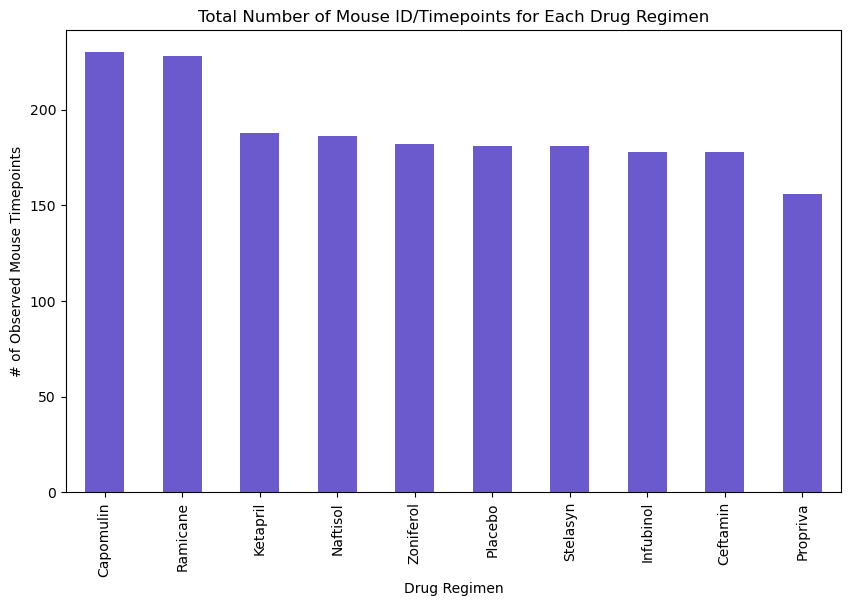

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_df['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar', color='slateblue', figsize=(10, 6))

plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

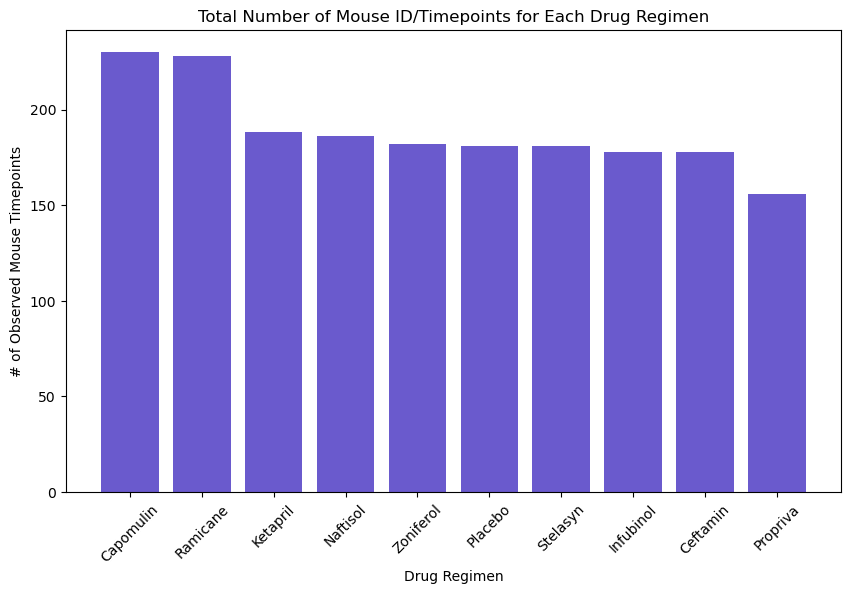

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='slateblue')

plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)

plt.show()

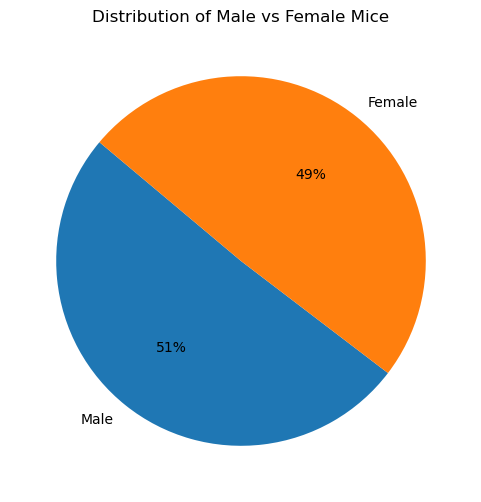

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = cleaned_df['Sex'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(mouse_gender, labels=mouse_gender.index, autopct='%1.0f%%', startangle=140)
plt.title('Distribution of Male vs Female Mice')
plt.show()

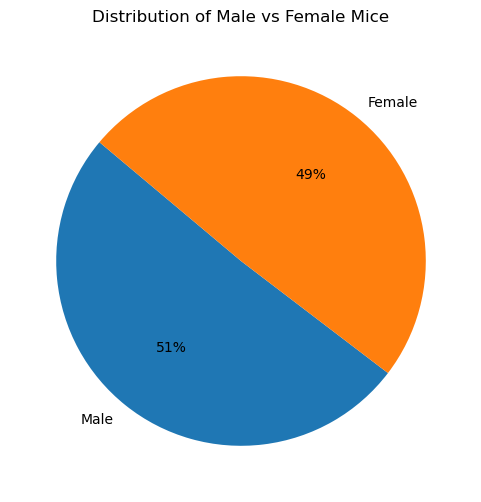

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(6, 6))
plt.pie(mouse_gender, labels=mouse_gender.index, autopct='%1.0f%%', startangle=140)
plt.title('Distribution of Male vs Female Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_merged_df = pd.merge(last_timepoint, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')
treatments_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volumes = new_merged_df[new_merged_df['Drug Regimen'].isin(treatments_of_interest)][['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
final_tumor_volumes

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
3,a275,Ceftamin,62.999356
6,a411,Ramicane,38.407618
7,a444,Ramicane,43.047543
...,...,...,...
239,y769,Ceftamin,68.594745
240,y793,Capomulin,31.896238
241,y865,Ceftamin,64.729837
245,z578,Ramicane,30.638696


In [16]:

# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset_df = new_merged_df.loc[new_merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    
    # add subset 
    tumor_vol_data.append(subset_df.values)
    
    # Determine outliers using upper and lower bounds
    quartiles = subset_df.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr

    outliers = subset_df[(subset_df <= lower_bound) | (subset_df >= upper_bound)]
    if not outliers.empty:
        print(f"Potential outliers for {treatment}: {outliers.values}")
    else:
        print(f"No potential outliers for {treatment}")


No potential outliers for Capomulin
No potential outliers for Ramicane
Potential outliers for Infubinol: [36.3213458]
No potential outliers for Ceftamin


/var/folders/1j/l1gnwgt93k1c9jq9s44wsnxc0000gn/T/ipykernel_11019/2514969091.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_data, labels=treatments, notch=True, vert=True)


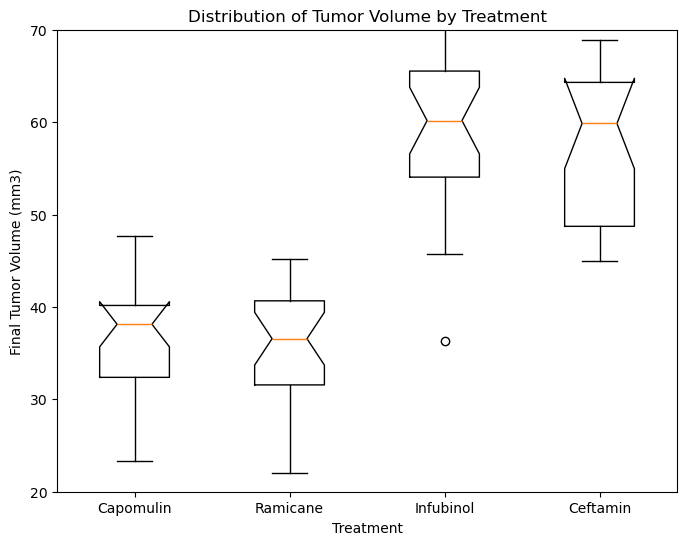

In [17]:

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 6))
plt.boxplot(tumor_vol_data, labels=treatments, notch=True, vert=True)
plt.title('Distribution of Tumor Volume by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.ylim(20, 70)  
plt.show()

## Line and Scatter Plots

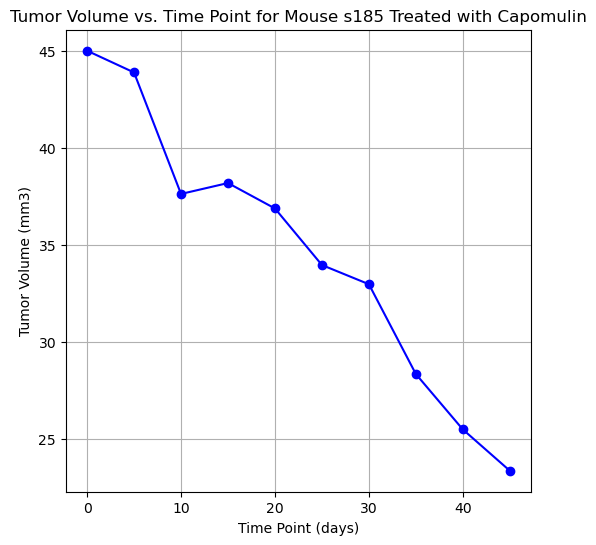

In [48]:

# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
selected_mouse_id = capomulin_data['Mouse ID'].unique()[0]  
selected_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == selected_mouse_id]
plt.figure(figsize=(6, 6))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o', color='blue')
plt.title(f'Tumor Volume vs. Time Point for Mouse {selected_mouse_id} Treated with Capomulin')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

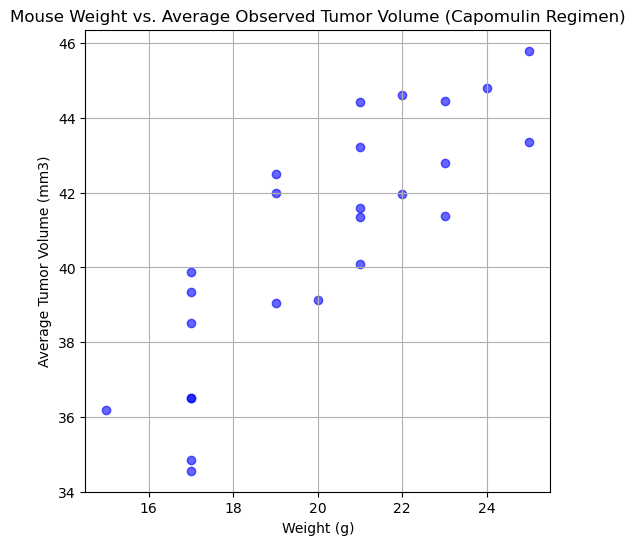

In [49]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_volume = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'first'}).reset_index()
plt.figure(figsize=(6, 6))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='blue', alpha=0.6)
plt.title('Mouse Weight vs. Average Observed Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

In [55]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
# Extract the weight and average tumor volume values
mouse_weight = average_tumor_volume['Weight (g)']
avg_tumor_volume = average_tumor_volume['Tumor Volume (mm3)']
# Calculate the correlation coefficient
correlation_coefficient = mouse_weight.corr(avg_tumor_volume)
print(f"Correlation Coefficient between mouse weight and average tumor volume: {correlation_coefficient}")
# Perform a linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, avg_tumor_volume)
# Generate values for the regression line
regression_line = slope * mouse_weight + intercept


Correlation Coefficient between mouse weight and average tumor volume: 0.8419363424694722


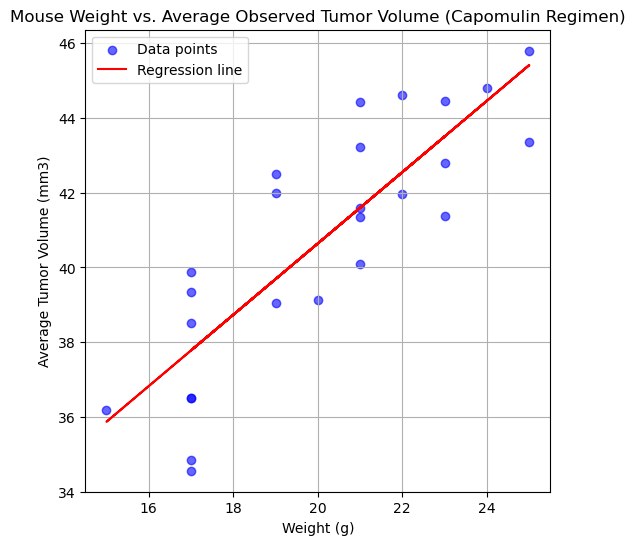

(0.8419363424694722,
 0.9544396890241049,
 21.552160532685008,
 0.7088568047708723)

In [57]:
# Plot the scatter plot with the regression line
plt.figure(figsize=(6, 6))
plt.scatter(mouse_weight, avg_tumor_volume, color='blue', alpha=0.6, label='Data points')
plt.plot(mouse_weight, regression_line, color='red', label='Regression line')
plt.title('Mouse Weight vs. Average Observed Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.show()

# Display the correlation and linear regression details
correlation_coefficient, slope, intercept, r_value**2